          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1     

/var/folders/lw/9_gcjfzs13bbbm4k28hnvhz00000gn/T/ipykernel_67054/3283875445.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(0, inplace=True)


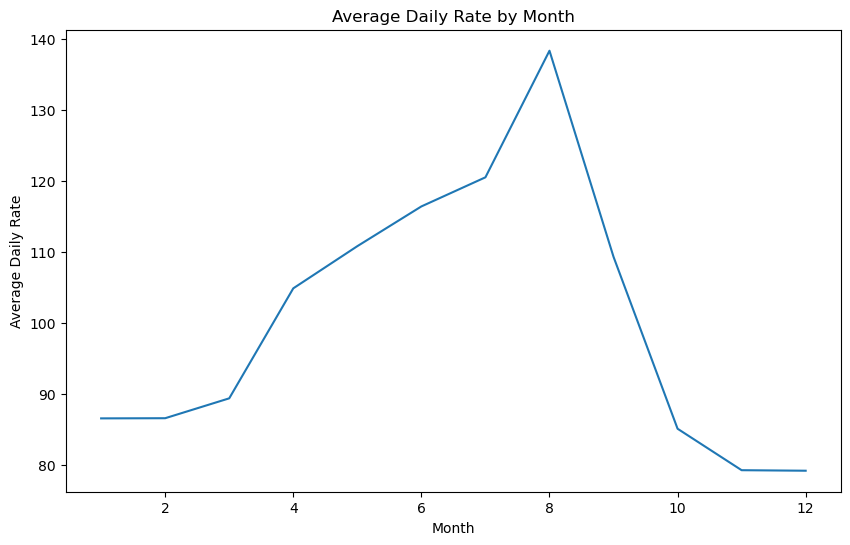

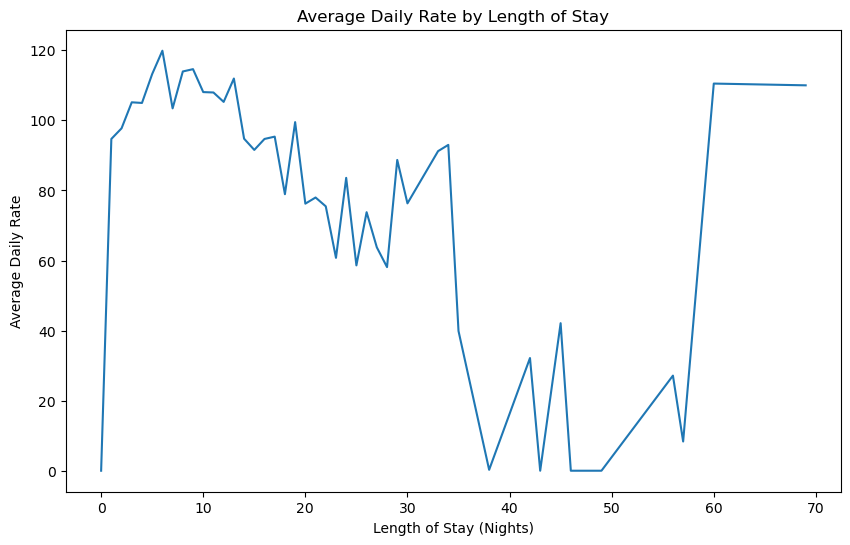

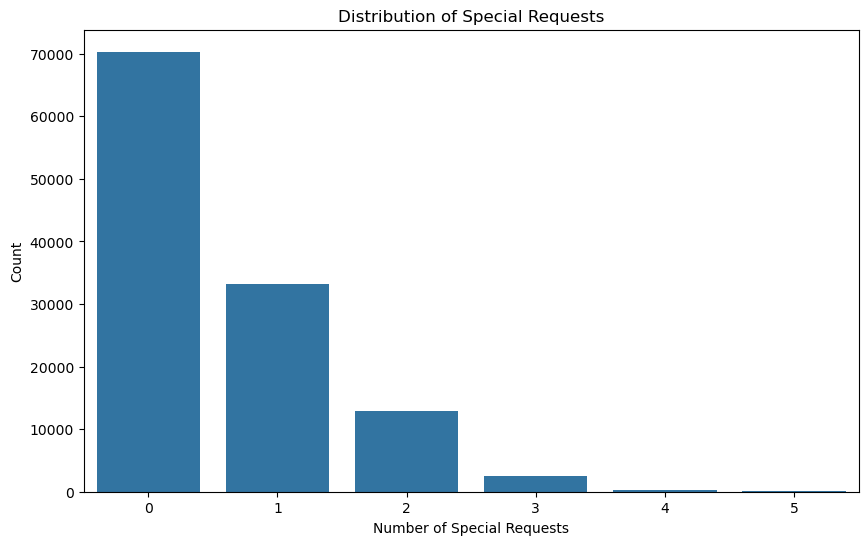

Accuracy: 0.9758354971103107
Confusion Matrix:
 [[23300     5]
 [  572     1]]
Classification Report:
               precision    recall  f1-score   support

       False       0.98      1.00      0.99     23305
        True       0.17      0.00      0.00       573

    accuracy                           0.98     23878
   macro avg       0.57      0.50      0.50     23878
weighted avg       0.96      0.98      0.96     23878



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('/Users/sudebkumarmandal/Downloads/hotel_bookings(in).csv')

# Display the first few rows of the dataset
print(df.head())

# Display basic information about the dataset
print(df.info())

# Display summary statistics of the dataset
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Fill missing values in 'children' with 0
df['children'].fillna(0, inplace=True)

# Convert 'reservation_status_date' to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Extract month and year from 'reservation_status_date'
df['month'] = df['reservation_status_date'].dt.month
df['year'] = df['reservation_status_date'].dt.year

# Group by month and calculate average daily rate
monthly_avg_rate = df.groupby('month')['adr'].mean()

# Plot the average daily rate by month
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_avg_rate)
plt.title('Average Daily Rate by Month')
plt.xlabel('Month')
plt.ylabel('Average Daily Rate')
plt.show()

# Calculate total stay duration
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Group by total nights and calculate average daily rate
length_of_stay_rate = df.groupby('total_nights')['adr'].mean()

# Plot the average daily rate by length of stay
plt.figure(figsize=(10, 6))
sns.lineplot(data=length_of_stay_rate)
plt.title('Average Daily Rate by Length of Stay')
plt.xlabel('Length of Stay (Nights)')
plt.ylabel('Average Daily Rate')
plt.show()

# Analyze the number of special requests
special_requests_dist = df['total_of_special_requests'].value_counts()

# Plot the distribution of special requests
plt.figure(figsize=(10, 6))
sns.barplot(x=special_requests_dist.index, y=special_requests_dist.values)
plt.title('Distribution of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Count')
plt.show()

# Logistic Regression to predict high number of special requests (e.g., more than 2)
df['high_special_requests'] = df['total_of_special_requests'] > 2

# Map months to numerical values
month_map = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 
             'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
df['arrival_date_month'] = df['arrival_date_month'].map(month_map)

# Selecting relevant features for prediction
features = ['lead_time', 'arrival_date_month', 'arrival_date_week_number', 
            'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 
            'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 
            'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 
            'required_car_parking_spaces']

X = df[features]
y = df['high_special_requests']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluating the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))